<a href="https://colab.research.google.com/github/delxnkD/delxnkD.github.io/blob/main/Pathfinding_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 6 hospitals in Heidelberg, Germany

Scenario 1: From point (49.409, 8.694) to nearest hospital


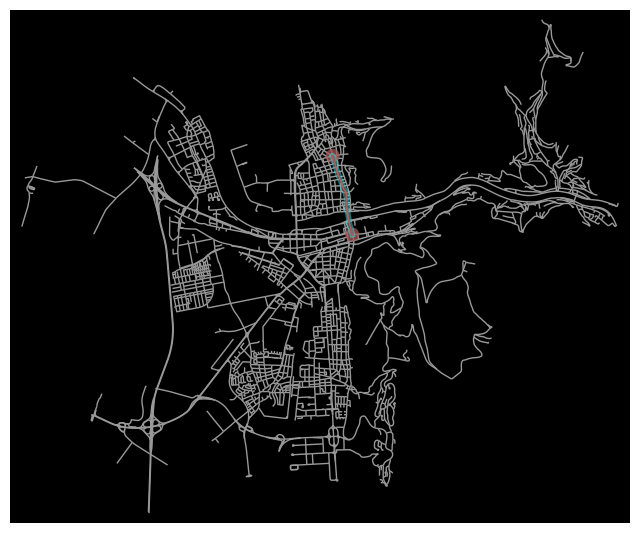


Scenario 2: From point (49.4, 8.68) to nearest hospital


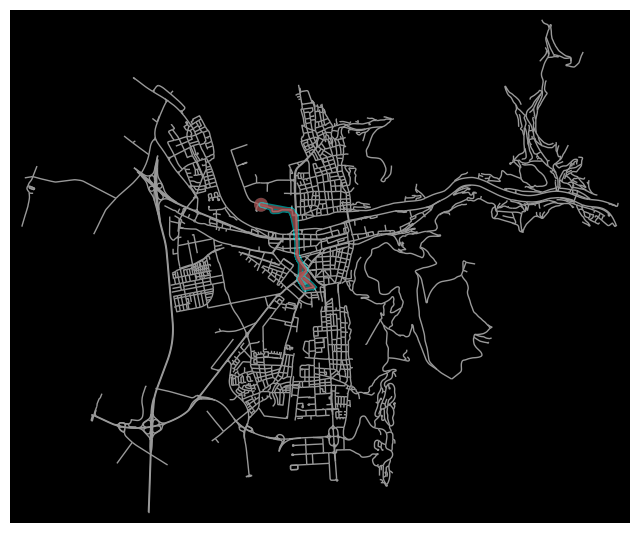


Scenario 3: From point (49.417, 8.702) to nearest hospital


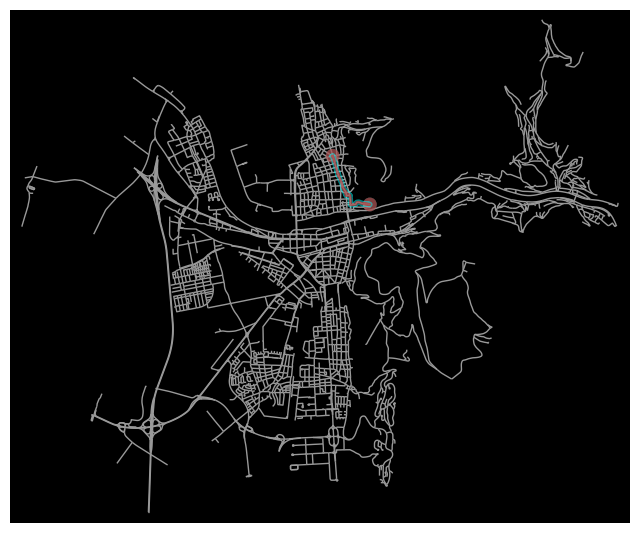


Scenario 4: From point (49.42, 8.69) to nearest hospital


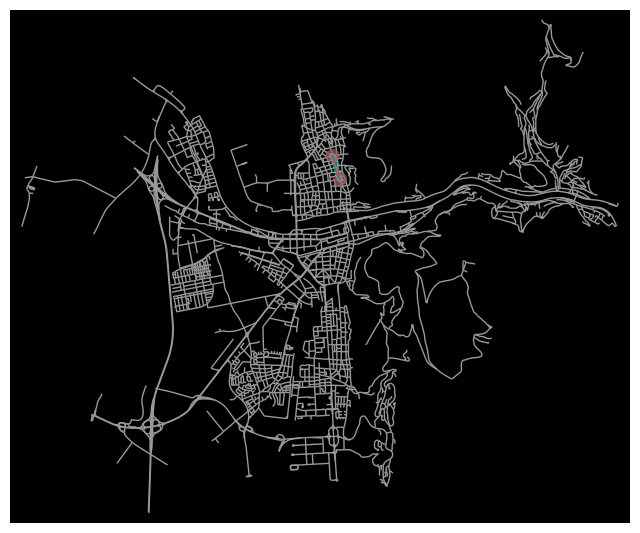


Scenario 5: From point (49.405, 8.71) to nearest hospital


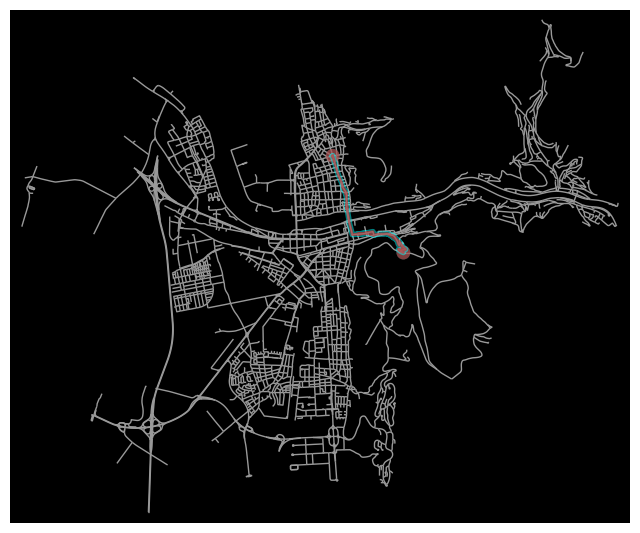


Summary Results:
Scenario 1:
  Dijkstra - Distance: 1829.88m, Time: 0.2724s, Memory: 151.16MB
  A*       - Distance: 1829.88m, Time: 4.8252s, Memory: 0.12MB
Scenario 2:
  Dijkstra - Distance: 3223.43m, Time: 0.4124s, Memory: 0.82MB
  A*       - Distance: 3223.43m, Time: 7.7004s, Memory: 0.19MB
Scenario 3:
  Dijkstra - Distance: 1697.48m, Time: 0.2192s, Memory: 0.50MB
  A*       - Distance: 1697.48m, Time: 3.1326s, Memory: 0.12MB
Scenario 4:
  Dijkstra - Distance: 551.52m, Time: 0.1840s, Memory: 0.46MB
  A*       - Distance: 551.52m, Time: 4.4531s, Memory: 0.13MB
Scenario 5:
  Dijkstra - Distance: 3693.90m, Time: 0.3287s, Memory: 1.18MB
  A*       - Distance: 3693.90m, Time: 7.6025s, Memory: 0.17MB


In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import time
import tracemalloc

# 1. Download city data
city = "Heidelberg, Germany"
graph = ox.graph_from_place(city, network_type='drive')

# 2. Get hospitals in the city
tags = {'amenity': 'hospital'}
hospitals = ox.features_from_place(city, tags)
hospital_points = []
for idx, row in hospitals.iterrows():
    if row.geometry.geom_type == 'Point':
        hospital_points.append((row.geometry.y, row.geometry.x))

print(f"Found {len(hospital_points)} hospitals in {city}")

# 3. Convert the graph to undirected for simplicity
G = graph.to_undirected()

# 4. Define helper to find nearest node
def nearest_node(G, point):
    return ox.nearest_nodes(G, point[1], point[0])

# 5. Define Dijkstra and A* functions
def run_dijkstra(G, start_node, hospital_nodes):
    lengths = {}
    paths = {}
    for target in hospital_nodes:
        length, path = nx.single_source_dijkstra(G, start_node, target, weight='length')
        lengths[target] = length
        paths[target] = path
    nearest_hospital = min(lengths, key=lengths.get)
    return lengths[nearest_hospital], paths[nearest_hospital]

def heuristic(u, v):
    point_u = (G.nodes[u]['y'], G.nodes[u]['x'])
    point_v = (G.nodes[v]['y'], G.nodes[v]['x'])
    return geodesic(point_u, point_v).meters

def run_astar(G, start_node, hospital_nodes):
    lengths = {}
    paths = {}
    for target in hospital_nodes:
        length = nx.astar_path_length(G, start_node, target, heuristic=heuristic, weight='length')
        path = nx.astar_path(G, start_node, target, heuristic=heuristic, weight='length')
        lengths[target] = length
        paths[target] = path
    nearest_hospital = min(lengths, key=lengths.get)
    return lengths[nearest_hospital], paths[nearest_hospital]

# 6. Get hospital nodes
hospital_nodes = [nearest_node(G, point) for point in hospital_points]

# 7. Define 5 test scenarios (random locations in the city)
test_points = [(49.409, 8.694), (49.400, 8.680), (49.417, 8.702), (49.420, 8.690), (49.405, 8.710)]
results = []

for idx, point in enumerate(test_points):
    print(f"\nScenario {idx+1}: From point {point} to nearest hospital")

    start_node = nearest_node(G, point)

    # Track Dijkstra performance
    tracemalloc.start()
    start_time = time.time()
    dijkstra_length, dijkstra_path = run_dijkstra(G, start_node, hospital_nodes)
    dijkstra_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    dijkstra_memory = peak / 10**6  # in MB
    tracemalloc.stop()

    # Track A* performance
    tracemalloc.start()
    start_time = time.time()
    astar_length, astar_path = run_astar(G, start_node, hospital_nodes)
    astar_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    astar_memory = peak / 10**6  # in MB
    tracemalloc.stop()

    results.append({
        "scenario": idx + 1,
        "start_point": point,
        "dijkstra": {"length": dijkstra_length, "time": dijkstra_time, "memory": dijkstra_memory},
        "astar": {"length": astar_length, "time": astar_time, "memory": astar_memory}
    })

    # Visualization
    fig, ax = ox.plot_graph_route(G, dijkstra_path, route_linewidth=4, node_size=0, bgcolor='k', route_color='cyan', show=False, close=False)
    ox.plot_graph_route(G, astar_path, route_linewidth=2, node_size=0, route_color='red', ax=ax)

# 8. Print summary
print("\nSummary Results:")
for r in results:
    print(f"Scenario {r['scenario']}:")
    print(f"  Dijkstra - Distance: {r['dijkstra']['length']:.2f}m, Time: {r['dijkstra']['time']:.4f}s, Memory: {r['dijkstra']['memory']:.2f}MB")
    print(f"  A*       - Distance: {r['astar']['length']:.2f}m, Time: {r['astar']['time']:.4f}s, Memory: {r['astar']['memory']:.2f}MB")


In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 1.8 MB/s eta 0:00:00
